In [ ]:
# Python program to implement decision tree algorithm and plot the tree

# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
# Loading the dataset
iris = load_iris()


In [ ]:
#converting the data to a pandas dataframe
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [ ]:
#creating a separate column for the target variable of iris dataset
data['Species'] = iris.target

In [ ]:
#replacing the categories of target variable with the actual names of the species
target = np.unique(iris.target)
target_n = np.unique(iris.target_names)
target_dict = dict(zip(target, target_n))
data['Species'] = data['Species'].replace(target_dict)

In [ ]:
# Separating the independent dependent variables of the dataset
x = data.drop(columns = "Species")
y = data["Species"]
names_features = x.columns
target_labels = y.unique()

In [ ]:
# Splitting the dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)

In [ ]:
# Importing the Decision Tree classifier class from sklearn
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating an instance of the classifier class
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)

In [ ]:
# Fitting the training dataset to the model
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=93)

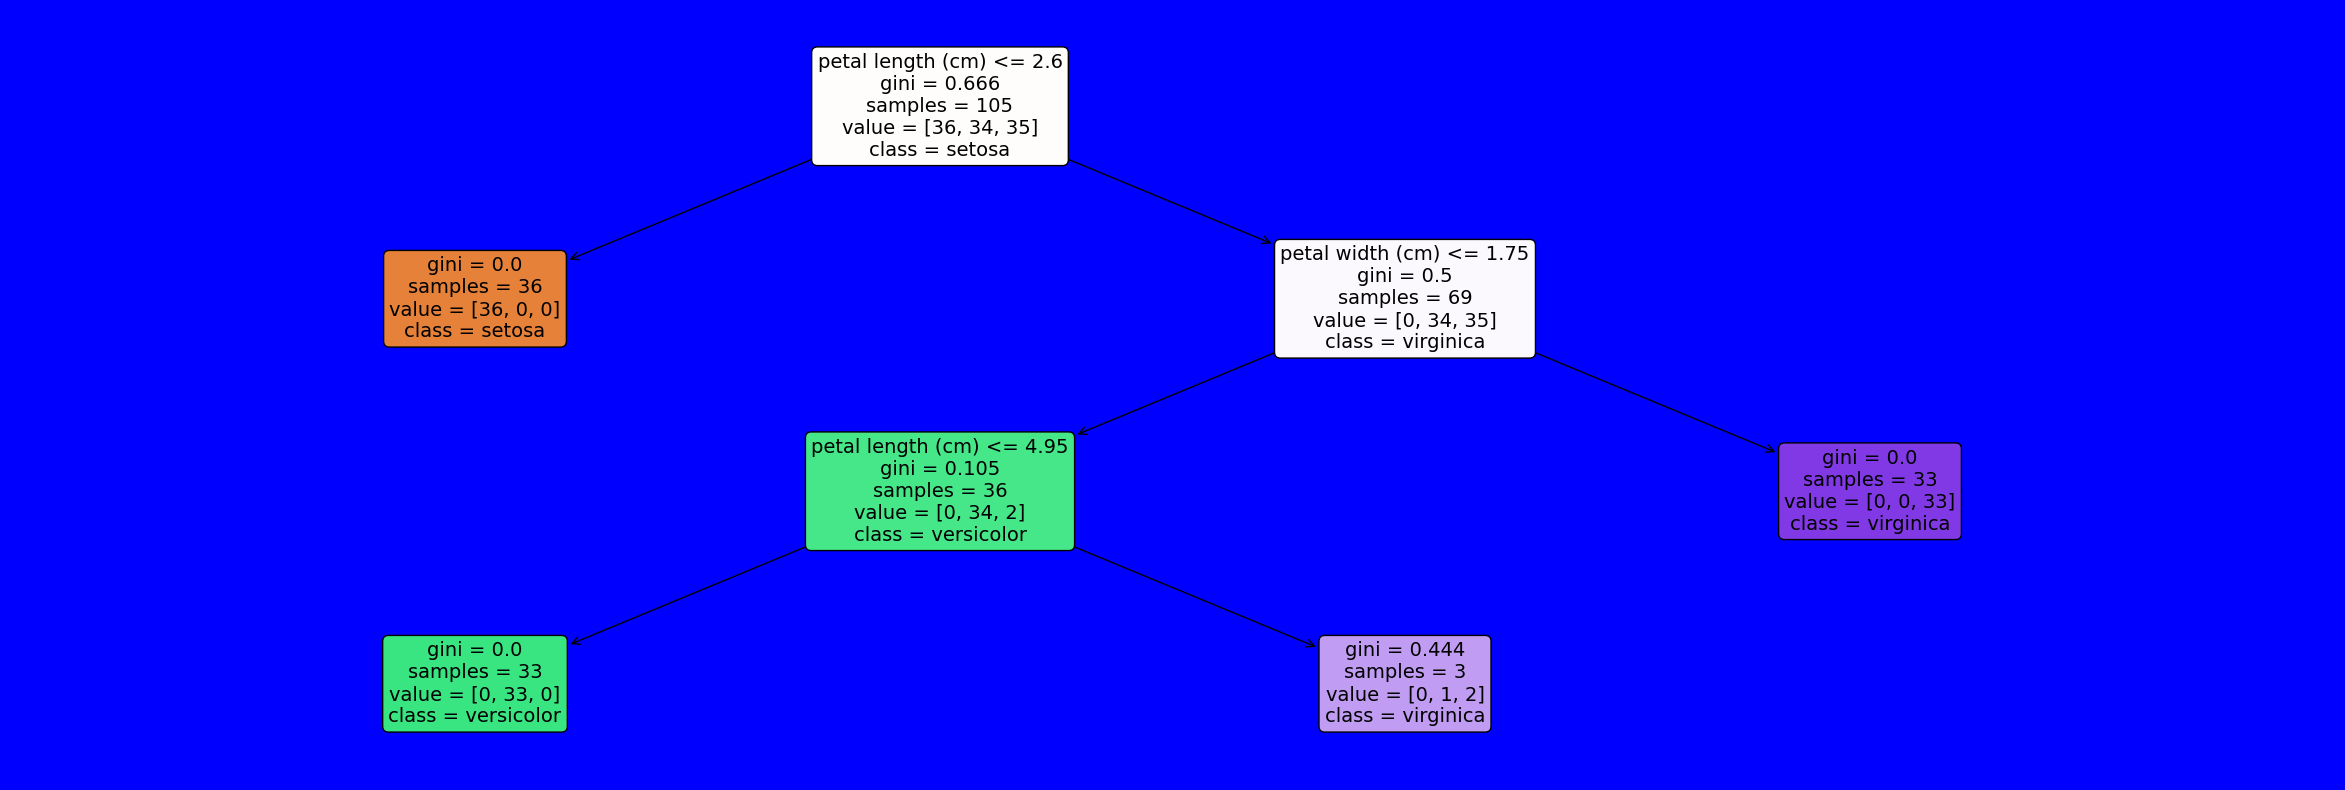

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize = (30, 10), facecolor = 'b')
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)
plt.show()
y_pred = dtc.predict(x_test)

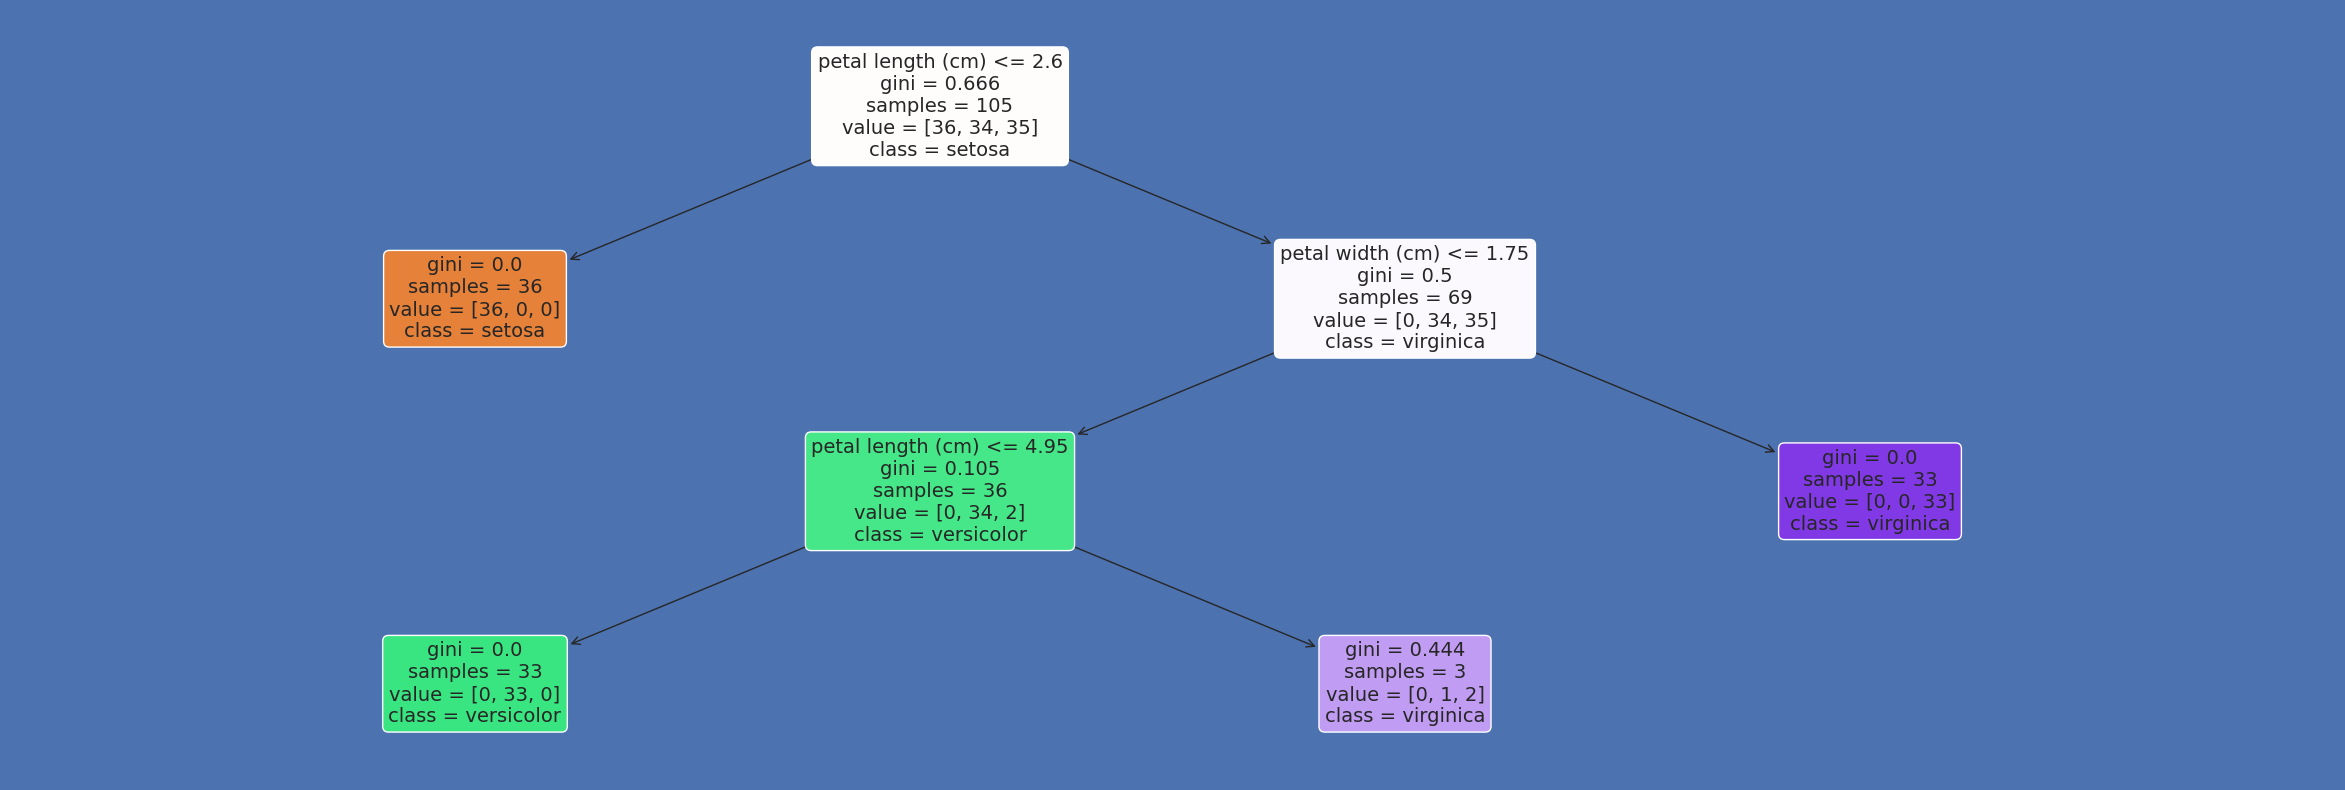

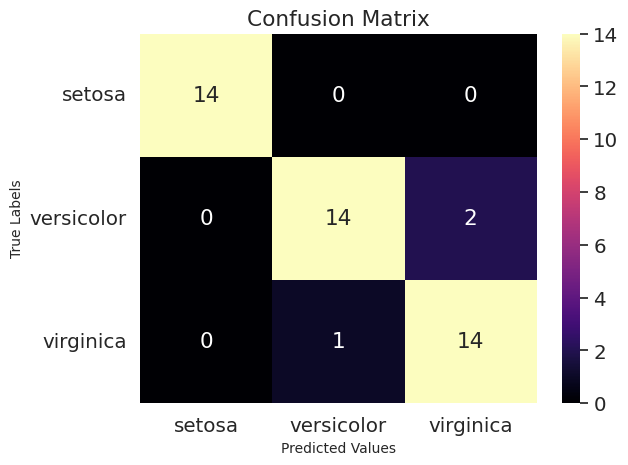

<Figure size 1000x700 with 0 Axes>

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize = (30, 10), facecolor = 'b')
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)
plt.show()
y_pred = dtc.predict(x_test)

# Finding the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)
axis = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))

# Plotting heatmap
sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize = 10)
axis.set_xticklabels([''] + target_labels)
axis.set_ylabel( "True Labels", fontsize = 10)
axis.set_yticklabels(list(target_labels), rotation = 0)
plt.show()